# Experiments

In [139]:
import numpy as np

In [220]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [141]:
from scipy import linalg
from scipy import sparse

In [142]:
from IPython.display import SVG

In [143]:
from sknetwork.data import block_model
from sknetwork.visualization import svg_graph
from sknetwork.utils import get_degrees

In [144]:
def communities(n_community, p, q, n):
    """
    Generate a random graph with n_community communities, p intra-community probability, q inter-community probability and n nodes.
    
    Parameters
    ----------
    n_community : int
        Number of communities   
    p : float   
        Probability of an edge within a community
    q : float
        Probability of an edge between communities
    n : int
        Number of nodes
    """
    label = np.zeros(n, dtype=int)
    position = np.zeros( (n,2) )
    adjacency = np.zeros( (n,n) )

    for i in range(n):
        label[i] = np.random.randint(n_community)
        c = label[i]
        position[i] = np.random.multivariate_normal( [np.round(1+c/n_community)*np.cos(2*np.pi*2*c/n_community),np.round(1+c/n_community)*np.sin(2*np.pi*2*c/n_community)],
                                                    0.05*np.eye(2) )

    for i in range(n):
        for j in range(i+1,n):
            if label[i] == label[j]:
                adjacency[i,j] = int(np.random.binomial(1, p))
            else:
                adjacency[i,j] = int(np.random.binomial(1, q))
            adjacency[j,i] = adjacency[i,j]
    
    return adjacency, label, position

In [145]:
n_community=15
p=0.5
q=0.001
n=1000
adjacency, label, position = communities(n_community, p, q, n)

In [146]:
image = svg_graph(sparse.csr_matrix(adjacency), position, labels=label, node_size=2, edge_width=0.05)
SVG(image)

In [147]:
def laplacian(A):
    """Unnormalized Laplacian of a graph"""
    return np.diag(np.sum(A, axis=1)) - A

def normalized_laplacian(A):
    """Normalized Laplacian of a graph"""
    d_sqr = np.sqrt( np.sum(A, axis=1) )
    d_inv = [1/x if x != 0 else 0 for x in d_sqr]
    return np.eye(A.shape[0]) - np.diag(d_inv) @ A

def compute_spectrum(L):
    """Compute the eigenvalues and eigenvectors of a matrix"""
    return linalg.eigvals(L)

def cayley_transform(L, h):
    """Cayley transform of a matrix L with zoom parameter h"""
    return (h*L - 1j*np.eye(L.shape[0])) @ np.linalg.inv(h*L + 1j*np.eye(L.shape[0]))

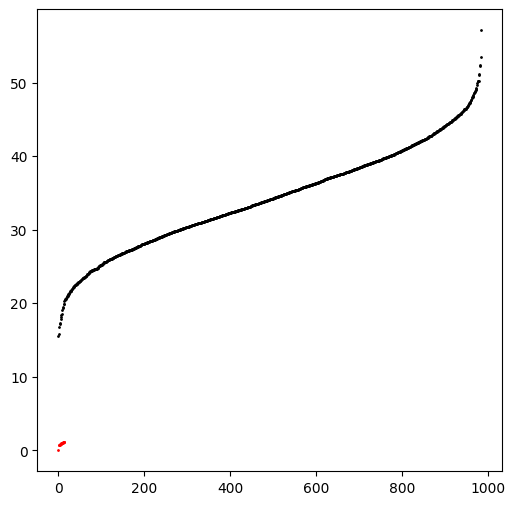

In [211]:
eigvals = np.array( sorted( compute_spectrum(laplacian(adjacency)).real ) )
plt.figure(figsize=(6,6))
plt.plot(eigvals[:15], 'ro', linestyle='None', markersize=1)
plt.plot(eigvals[15:], 'ko', linestyle='None', markersize=1)
plt.show()

In [229]:
def plot_mapped_spectrum(A, h=1):
    """Plot the spectrum of the Cayley transform of the laplacian of a matrix A with zoom parameter h"""

    def generate_semicircle(center_x=0, center_y=0, radius=1, stepsize=0.01):
        """
        generates coordinates for a semicircle, centered at center_x, center_y
        """        
        angle = np.linspace(0, -np.pi, int(np.pi/stepsize))
        x = np.cos(angle)*radius
        y = np.sin(angle)*radius

        return x, y

    C = cayley_transform( laplacian(adjacency), h )
    mapped_eigvals = np.array( sorted( compute_spectrum(C), key=lambda x: x.real ) )

    plt.figure(figsize=(4,3))
    plt.scatter(mapped_eigvals.real[:15], mapped_eigvals.imag[:15], c='r', marker='+', linewidth=0.5, s=20)
    plt.scatter(mapped_eigvals.real[15:], mapped_eigvals.imag[15:], c='k', marker='+', linewidth=0.5, s=20)
    plt.xlabel('Re', fontsize=12)
    plt.ylabel('Im', fontsize=12)

    x, y = generate_semicircle()
    plt.plot(x, y, 'k', linewidth=0.5)

    plt.show()

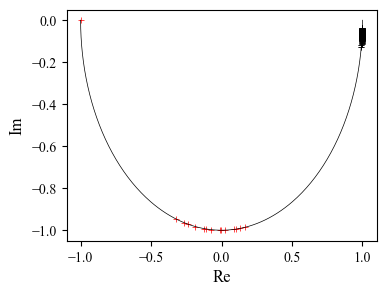

In [230]:
plot_mapped_spectrum(adjacency, h=1)

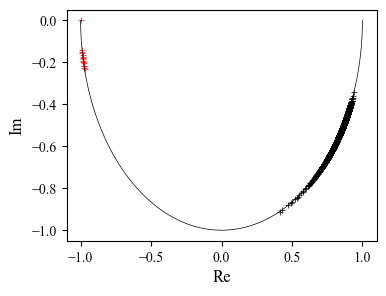

In [231]:
plot_mapped_spectrum(adjacency, h=0.1)

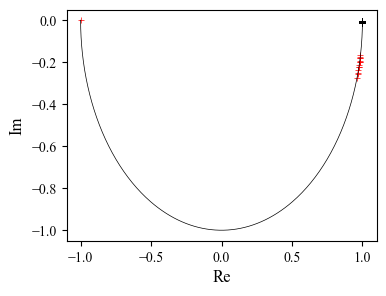

In [232]:
plot_mapped_spectrum(adjacency, h=10)